# LFV Higgs decays in SeeSaw model ( Thao et al results)

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$h W^{+\mu} W^{-\nu}$|$i g m_{W} g_{\mu \nu}$|$h G_{W}^{+} G_{W}^{-}$|$\frac{-igm_h^2}{2 m_W}$|
|$h G_{W}^{+} {W}^{-\mu}$|$\frac{ig}{2}(p_{+}- p_0)_{\mu}$|$h G_{W}^{-} W^{+\mu}$|$\frac{i g}{2}\left(p_{0}-p_{-}\right)_{\mu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$h\overline{n_i}n_j$|$\frac{-i g}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|$h\overline{e_a}e_a$|$\frac{-ig m_{e_a}}{2 m_W}$|




In [116]:
from sympy import symbols, init_printing, conjugate,I,pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
init_printing()

**Assigning masses of initial and final particles**

In [117]:
import OneLoopLFVHD as lfvhd

**Defining symbolic variables**

In [118]:
g = symbols('g',positive=True)
mW,mG = symbols('m_W,m_G',positive=True)


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

In [119]:
mh = lfvhd.ma
me = {a:lfvhd.mi,b:lfvhd.mj}
me

**Defining vertexes**

In [120]:
vertexhWW = lfvhd.VertexHVV(I*g*mW)
vertexhGG = lfvhd.VertexHSS((-I*g*mh**2)/(2*mW))

vertexhWG = lfvhd.VertexHVpSm(I*g/2)
vertexhGW = lfvhd.VertexHSpVm(I*g/2)

vertexneWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),
                                          (-I*g)/(2*mW)*(mn[i]*C[i,j] + mn[j]*Cc[i,j]))

vertexhee = lambda a:lfvhd.VertexHFF((-I*g*me[a])/(2*mW))

## Form factors of SeeSaw model

We are taking the diagrams of [Lepton flavor violating Higgs boson decays from massive seesaw neutrinos](https://arxiv.org/pdf/hep-ph/0407302.pdf), and we reproduce the form factor of [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

### Triangle Gninj
The **left** form factor

$$\begin{aligned} F_{L}^{(1)} &=-\frac{g^{3} m_{a}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*}\left\{C_{i j}\left[m_{n j}^{2}\left(B_{0}^{(12)}+m_{W}^{2} C_{0}\right)\right.\right.\\ &\left.-\left(m_{a}^{2} m_{n j}^{2}+m_{b}^{2} m_{n_{i}}^{2}-2 m_{n_{i}}^{2} m_{n_{j}}^{2}\right) C_{1}\right] \\ &\left.+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left[B_{0}^{(12)}+m_{W}^{2} C_{0}+\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}-m_{a}^{2}-m_{b}^{2}\right) C_{1}\right]\right\} \end{aligned}$$

In [121]:
A = g**3/(64*pi**2*mW**3)
m = IndexedBase('m')
h,ea,eb = symbols('h,e_a,e_b');
cambios = {lfvhd.ma:m[h],lfvhd.mi:m[a],lfvhd.mj:m[b]}
cambios_cross = {lfvhd.ma:m[h],lfvhd.mi:m[b],lfvhd.mj:m[a]}

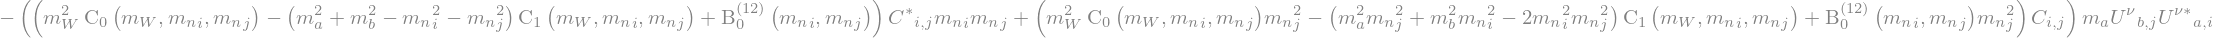

In [122]:
triangleGninj = lfvhd.TriangleSFF(vertexhnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mW,mn[i],mn[j]])
AL1 = (-triangleGninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleGninj.Cs
                                                            ).simplify().subs(cambios)
AL1

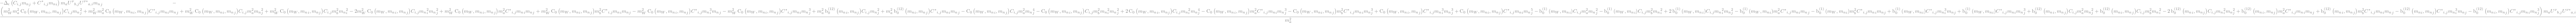

In [123]:
AL1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand().collect([lfvhd.Δe],factor)

This is the diagram 1 of our reference (1) and the **right** form factor is given by

$\begin{aligned} F_{R}^{(1)} &=-\frac{g^{3} m_{b}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*}\left\{C_{i j}\left[m_{n_{i}}^{2}\left(B_{0}^{(12)}+m_{W}^{2} C_{0}\right)\right.\right.\\ &\left.+\left(m_{a}^{2} m_{n_{j}}^{2}+m_{b}^{2} m_{n_{i}}^{2}-2 m_{n_{i}}^{2} m_{n_{j}}^{2}\right) C_{2}\right] \\ &\left.+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left[B_{0}^{(12)}+m_{W}^{2} C_{0}-\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}-m_{a}^{2}-m_{b}^{2}\right) C_{2}\right]\right\} \end{aligned}$

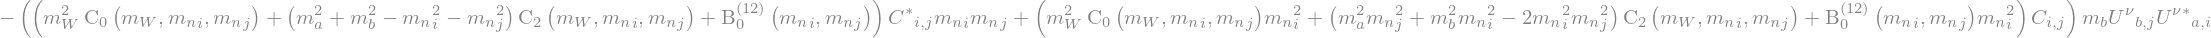

In [124]:
(-triangleGninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect([lfvhd.C2(mW,mn[i],mn[j])]).simplify(
).simplify().subs(cambios)

### Triangle Wninj

This is the diagram 2 of our reference (**we changed the coupling $enW^-(j,b)$ and $enW^+(i,a)$ by $enW^+(j,b)$ and $enW^-(i,a)$**)

In [125]:
#vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),(-I*g)/(2*mW)*(
#    mn[i]*C[i,j] + mn[j]*Cc[i,j]))
triangleWninj = lfvhd.TriangleVFF(vertexhnn(i,j),vertexneWu(j,b),vertexenWd(i,a),[mW,mn[i],mn[j]])

$\begin{aligned} F_{L}^{(2)} &=\frac{g^{3} m_{a}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*} \times 2 m_{W}^{2} \\ & \times\left\{C_{i j}\left[m_{n_{j}}^{2} C_{0}-\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}\right) C_{1}\right]+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left(C_{0}-2 C_{1}\right)\right\} \end{aligned}$

In [126]:
AL2 = (-triangleWninj.AL().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AL2

 $\begin{aligned} F_{R}^{(2)} &=\frac{g^{3} m_{b}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*} \times 2 m_{W}^{2} \\ & \times\left\{C_{i j}\left[m_{n_{i}}^{2} C_{0}+\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}\right) C_{2}\right]+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left(C_{0}+2 C_{2}\right)\right\} \end{aligned}$

In [127]:
(-triangleWninj.AR().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()

### Triangle niWW

This is the diagram 3 of our reference (**we changed the coupling $enW^-(j,b)$ and $enW^+(i,a)$ by $enW^+(j,b)$ and $enW^-(i,a)$**)

In [128]:
triangleniWW = lfvhd.TriangleFVV(vertexhWW,vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

In [129]:
AL3 = (-triangleniWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AL3

In [130]:
(-triangleniWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

### Triangle niWG

This is the diagram 4 of our reference

In [131]:
es = {b:eb,a:ea}
#cambiosba = {lfvhd.ma:m[h],lfvhd.mi:m[b],lfvhd.mj:m[a]}
#vertexenGdRL = lambda j,b: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j],
#                               (I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j])
#vertexenGdRL(i,a).show().simplify().subs(cambios)

In [132]:
triangleniWG = lfvhd.TriangleFVS(vertexhWG,vertexneGu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

In [133]:
AL4 = (-triangleniWG.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL4

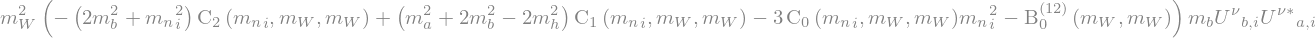

In [134]:
(-triangleniWG.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGW

This is the diagram 5 of our reference

In [135]:
#vertexneGuRL = lambda i,a: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i],
#                                         (-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i])

In [136]:
triangleniGW = lfvhd.TriangleFSV(vertexhGW,vertexneWu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

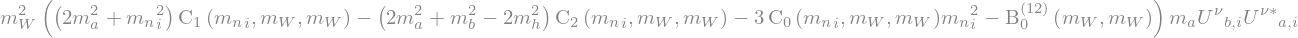

In [137]:
AL5 = (-triangleniGW.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL5

In [138]:
(-triangleniGW.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGG

This is the diagram 6 of our reference

In [139]:
triangleniGG = lfvhd.TriangleFSS(vertexhGG,vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

In [140]:
AL6 = (-triangleniGG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL6

In [141]:
(-triangleniGG.AR()/A).expand().collect([mn[i]],simplify
                                  ).simplify().subs(cambios)

### Bubble niW

This is the diagram 7 of our reference (**we changed the coupling $enW^-(j,b)$ and $enW^+(i,a)$ by $enW^+(j,b)$ and $enW^-(i,a)$**)

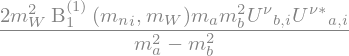

In [142]:
bubbleniW = lfvhd.BubbleFV(vertexhee(b),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])
AL7 = (-bubbleniW.AL()/A).subs(lfvhd.D,4).subs(cambios)
AL7

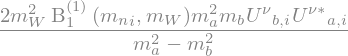

In [143]:
(-bubbleniW.AR()/A).subs(lfvhd.D,4).subs(cambios)

### Bubble Wni

This is the diagram 9 of our reference (**we changed the coupling $enW^-(j,b)$ and $enW^+(i,a)$ by $enW^+(j,b)$ and $enW^-(i,a)$**)

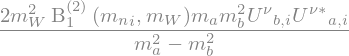

In [144]:
bubbleWni = lfvhd.BubbleVF(vertexhee(a),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])
AL9 = (-bubbleWni.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AL9

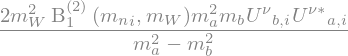

In [145]:
(-bubbleWni.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()

**Adding bubble niW y Wni**

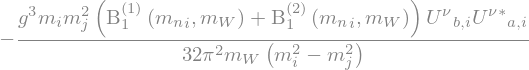

In [146]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).simplify()
BniW_L

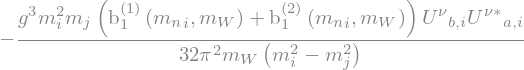

In [147]:
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).simplify()
BniW_R.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

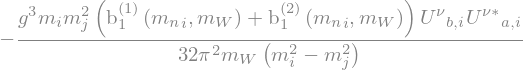

In [148]:
BniW_L.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

### Bubble niG

This is the diagram 8 of our reference

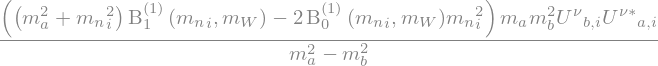

In [149]:
bubbleniG = lfvhd.BubbleFS(vertexhee(b),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])
AL8 = (-bubbleniG.AL()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AL8

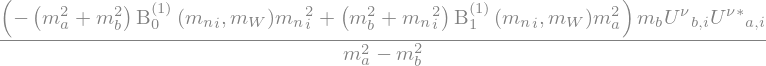

In [150]:
AR8 = (-bubbleniG.AR()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AR8

### Bubble Gni

This is the diagram 10 of our reference

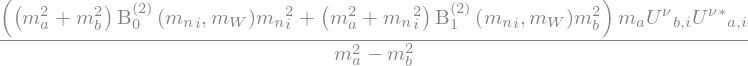

In [151]:
#bubbleWni = lfvhd.BubbleVF(vertexhee(a),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])
bubbleGni = lfvhd.BubbleSF(vertexhee(a),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])
AL10 = (-bubbleGni.AL()/A).collect([
      lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AL10

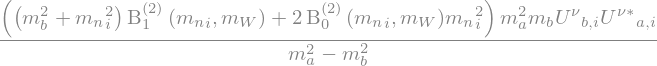

In [152]:
AR10 = (-bubbleGni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AR10

**Adding bubble niG y Gni**

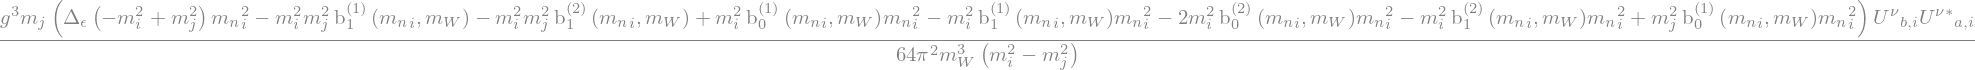

In [153]:
BniG_L =  (bubbleniG.AL() + bubbleGni.AL()).subs(lfvhd.D,4).simplify()
#BB1 = BniG_L.subs(mn[j],mn[i]).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)
 #                                  ).expand().collect(lfvhd.Δe,simplify)
#BB1.subs({lfvhd.mi:m[a],lfvhd.mj:m[b]})#.atoms(Symbol)
(bubbleniG.AR() + bubbleGni.AR()).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)
                    ).expand().collect(lfvhd.Δe).simplify()

In [154]:
from sympy import Add

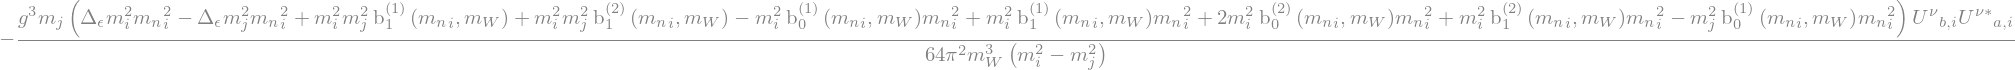

In [155]:
BniG_R =  (bubbleniG.AR() + bubbleGni.AR()).subs(lfvhd.D,4).simplify()
BB2 = BniG_R.subs(mn[j],mn[i]).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).simplify()
BB2

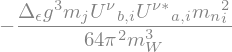

In [156]:
Add(*[x for x in BB2.expand().args if x.has(lfvhd.Δe)]).simplify()

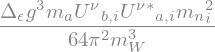

In [157]:
div8 = (
    (AL8 + AL10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW))
).expand().collect([lfvhd.Δe],evaluate=False)
div7 = (
    (AL7 + AL9).subs(lfvhd.cambiosDivFin(mn[i],mW,mW))
).expand().collect([lfvhd.Δe],evaluate=False)
#lfvhd.Δe*div8[lfvhd.Δe].factor()#
((AL8 + AL10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()*A

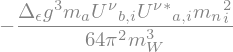

In [158]:
DivL1 = -triangleGninj.AL().subs(
    lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand().collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe
DivL1.expand().subs(C[i,j],0).subs(cambios).subs({Cc[i,j]:1,Uν[b,j]:Uν[b,i],mn[j]:mn[i]})

## Adding all contributions

In [159]:
from sympy import Symbol,lambdify

In [160]:
TrianglesTwoFermion = [triangleGninj,triangleWninj]
TrianglesOneFermion = [triangleniWW,
         triangleniWG,triangleniGW,
         triangleniGG]
Bubbles = [bubbleniW,bubbleniG,bubbleWni,bubbleGni]

In [161]:
ALOneFermion = 0;AROneFermion = 0;
for topology in [TrianglesOneFermion,Bubbles]:
    for diag in topology:
        masas = diag.masas
        #display(masas)
        if len(masas)==3:
            splitting = lfvhd.cambiosDivFin(*masas)
            aprroximation = lfvhd.cambios_aprox(*masas)
        else:
            splitting = lfvhd.cambiosDivFin(*masas,mW)
            aprroximation = lfvhd.cambios_aprox(*masas,mW)
        AL = diag.AL().subs(splitting).subs(lfvhd.D,4).subs(lfvhd.Δe,0)
        AR = diag.AR().subs(splitting).subs(lfvhd.D,4).subs(lfvhd.Δe,0)
        ALOneFermion += AL.subs(aprroximation)#.subs(cambios)
        AROneFermion += AR.subs(aprroximation)#.subs(cambios)
        display(ALOneFermion.atoms(Symbol))

In [162]:
ALOneFermion.expand().collect([lfvhd.mi,lfvhd.mj],evaluate=False).keys(),AROneFermion.expand().collect([lfvhd.mi,lfvhd.mj],evaluate=False).keys()

(dict_keys([m_i**3, m_i]), dict_keys([m_j**3, m_j, m_i**2]))

## Numeric implementation of form factors

In [163]:
#m[a]:1.777,m[b]:0.1507
Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')

In [164]:
from Unu_seesaw import Unu
import numpy as np
from scipy.special import spence
def sci_polylog(s,z):
    return spence(1-z)

In [165]:
m1=1e-12#GeV
m6np = np.linspace(1e-5,10000,5)
Unu(m1,m6np,4,1)

array([0.-5.99226565e-04j, 0.-3.78984155e-08j, 0.-2.67982267e-08j,
       0.-2.18806604e-08j, 0.-1.89492078e-08j])

### Form factor with one fermion in the loop.

Neutrino benchmark is given by 

In [166]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [167]:
m1 = 1e-12 #GeV

#d21 = Nudata.squareDm21.central*1e-18# este último factor convierte eV^2 a GeV^2
#d31 = Nudata.squareDm31.central*1e-18

d21 = 7.5e-5*1e-18
d31 = 2.457e-3*1e-18
m2 = np.sqrt(m1**2 + d21)
m3 = np.sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

def mis(m6):
    if isinstance(m6,(np.ndarray)):
        return np.array([m1*np.ones_like(m6),m2*np.ones_like(m6),m3*np.ones_like(m6),
                         m4(m6),m5(m6),m6])#+np.zeros_like(m6)*1j
    else:
        return np.array([m1,m2,m3,m4(m6),m5(m6),m6])#+np.zeros(6)*1j
mis(np.linspace(1,2,3))#[1]**2 - mis(np.linspace(1,2,3))[0]**2

array([[1.00000000e-12, 1.00000000e-12, 1.00000000e-12],
       [8.71779789e-12, 8.71779789e-12, 8.71779789e-12],
       [4.95782210e-11, 4.95782210e-11, 4.95782210e-11],
       [3.33333333e-01, 5.00000000e-01, 6.66666667e-01],
       [5.00000000e-01, 7.50000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.50000000e+00, 2.00000000e+00]])

In [168]:
#list(ALOneFermion.subs(
#   {Uν[b,i]:Ubi,Uνc[a,i]:Ucai,mn[i]:mni}).subs(valores).atoms(Symbol))
#ALOneFermion.atoms(Symbol)

#### AL one fermion 

In [169]:
mh,ma,mb = symbols('m_h,m_a,m_b',real=True)
cambios2 = {m[a]:ma,m[b]:mb,m[h]:mh}
valores ={mW:80.379,mh:125.18,g:(2*80.379)/(246)}
ALOneFermionS = ALOneFermion.subs(cambios).subs(cambios2).subs(
    {Uν[b,i]:Ubi,Uνc[a,i]:Ucai,mn[i]:mni}).subs(valores)#.atoms(Symbol)
ALOneFermionS.atoms(Symbol)

In [170]:
#dictALOne = ALOneFermionS.expand().collect(mni,evaluate=False)
#list(dictALOne.keys())

In [171]:
ALOneFermionNum = lambdify([ma,mb,mni,Ubi,Ucai],ALOneFermionS,modules=[
    'numpy',{'polylog':sci_polylog}])

In [172]:
def ALOneFermionnp(m6,a,b):
    masas = mis(m6)
    mtau = 1.77686
    mmu = 0.10566
    me = 0.000511
    ml = {1:me,2:mmu,3:mtau}
    al = 0
    mm1 = masas[0]
    mm6 = masas[-1]
    for i in range(1,7):
        al += np.nan_to_num(ALOneFermionNum(ml[a],ml[b],masas[i-1],
                                            Unu(mm1,mm6,b,i),np.conjugate(Unu(mm1,mm6,a,i))))
        #print(al)
        #print('*'*30)
    return al

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


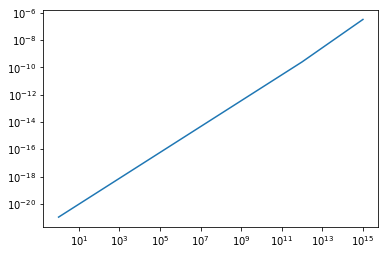

In [174]:
n = 1000
m6np = np.linspace(1,1e15,n,dtype=np.float64) + np.zeros(n)*1j
#np.abs(ALOneFermionnp(m6np,2,3))
#m6np
plt.loglog(m6np,np.abs(ALOneFermionnp(m6np,1,3)))

#### AR one fermion 

In [175]:
AROneFermionS = AROneFermion.subs(cambios).subs(cambios2).subs(
    {Uν[b,i]:Ubi,Uνc[a,i]:Ucai,mn[i]:mni}).subs(valores)#.atoms(Symbol)
ALOneFermionS.atoms(Symbol)

In [176]:
AROneFermionNum = lambdify([ma,mb,mni,Ubi,Ucai],AROneFermionS,modules=[
    'numpy',{'polylog':sci_polylog}])

In [177]:
def AROneFermionnp(m6,a,b):
    masas = mis(m6)
    mtau = 1.77686
    mmu = 0.10566
    me = 0.000511
    ml = {1:me,2:mmu,3:mtau}
    ar = 0
    mm1 = masas[0]
    mm6 = masas[-1]
    for i in range(1,7):
        ar += np.nan_to_num(AROneFermionNum(ml[a],ml[b],masas[i-1],
                                            Unu(mm1,mm6,b,i),np.conjugate(Unu(mm1,mm6,a,i))))
        #print(al)
        #print('*'*30)
    return ar

/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


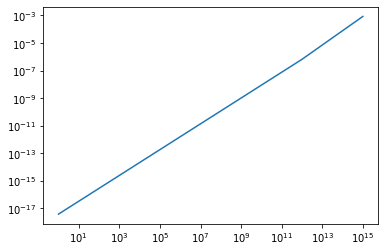

In [178]:
#np.abs(AROneFermionnp(1000,2,3))
plt.loglog(m6np,np.abs(AROneFermionnp(m6np,1,3)))
#np.isnan(AROneFermionnp(m6np,2,3))

### Form factor with two fermion in the loop.

In [179]:
ALTwoFermion = 0;ARTwoFermion = 0;
for diag in TrianglesTwoFermion:
    masas = diag.masas
    display(masas)
    splitting = lfvhd.cambiosDivFin(*masas)
    aprroximation = lfvhd.cambios_aprox(*masas)
    AL = diag.AL().subs(splitting)
    AR = diag.AR().subs(splitting)
    ALTwoFermion += AL.subs(lfvhd.D,4).subs(
    lfvhd.Δe,0).subs(aprroximation)
    ARTwoFermion += AR.subs(lfvhd.D,4).subs(
    lfvhd.Δe,0).subs(aprroximation)
    

#### AL TwoFermion

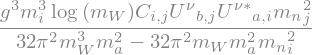

In [180]:
ALTwoFermion.expand().args[0]

In [181]:
Ubj,mnj, Cijs,Cijcs = symbols('{{U_{bj}}},m_{n_j}, C_{ij},{{C_{ij}^*}}')

In [182]:
#{lfvhd.mi:m[a],lfvhd.mj:m[b]}
ALTwoFermionS = ALTwoFermion.subs(cambios).subs(cambios2).subs(
    {Uν[b,j]:Ubj,Uνc[a,i]:Ucai,mn[i]:mni,mn[j]:mnj,
     C[i,j]:Cijs,Cc[i,j]:Cijcs}).subs(valores)
ALTwoFermionS.atoms(Symbol)

In [183]:
#valores.keys()

In [184]:
#ALTwoFermion.subs(cambios).subs(cambios2).subs(
#    {Uν[b,j]:Ubj,Uνc[a,i]:Ucai,mn[i]:mni,mn[j]:mnj,
#C[i,j]:Cijs,Cc[i,j]:Cijcs}).subs(valores).atoms(Symbol)

In [185]:
#dictALTwo = ALTwoFermionS.expand().collect([mni,mnj],evaluate=False)
#list(dictALTwo.keys())

In [186]:
ALTwoFermionNum = lambdify([ma,mb,mni,mnj,Ubj,Ucai,Cijs,Cijcs],ALTwoFermionS,
                           modules=['numpy',{'polylog':sci_polylog}])

In [187]:
from Unu_seesaw import Cij

In [188]:
def ALTwoFermionnp(m6,a,b):
    masas = mis(m6)
    mtau = 1.77686
    mmu = 0.10566
    me = 0.000511
    ml = {1:me,2:mmu,3:mtau}
    al = 0
    mm1 = masas[0]
    mm6 = masas[-1]
    for i in range(1,7):
        for j in range(1,7):
            r = ALTwoFermionNum(ml[a],ml[b],masas[i-1],masas[j-1],
                                      Unu(mm1,mm6,b,j), np.conjugate(Unu(mm1,mm6,a,i)),
                                      Cij(mm1,mm6,i,j),np.conjugate(Cij(mm1,mm6,i,j)))
            r = np.nan_to_num(r)
            al += r
            #print(al)
    return al

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in multiply


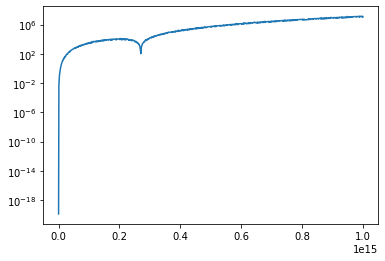

In [189]:
plt.semilogy(np.abs(m6np),np.abs(ALTwoFermionnp(m6np,2,3)))

#### AR Two Fermion

In [190]:
ARTwoFermionS = ARTwoFermion.subs(cambios).subs(cambios2).subs(
    {Uν[b,j]:Ubj,Uνc[a,i]:Ucai,mn[i]:mni,mn[j]:mnj,
     C[i,j]:Cijs,Cc[i,j]:Cijcs}).subs(valores)

In [191]:
ARTwoFermionNum = lambdify([ma,mb,mni,mnj,Ubj,Ucai,Cijs,Cijcs],ARTwoFermionS,
                           modules=['numpy',{'polylog':sci_polylog}])

In [192]:
def ARTwoFermionnp(m6,a,b):
    masas = mis(m6)
    masas = mis(m6)
    mtau = 1.77686
    mmu = 0.10566
    me = 0.000511
    ml = {1:me,2:mmu,3:mtau}
    ar = 0
    mm1 = masas[0]
    mm6 = masas[-1]
    for i in range(1,7):
        for j in range(1,7):
            r = ARTwoFermionNum(ml[a],ml[b],masas[i-1],masas[j-1],
                                      Unu(mm1,mm6,b,j), np.conjugate(Unu(mm1,mm6,a,i)),
                                      Cij(mm1,mm6,i,j),np.conjugate(Cij(mm1,mm6,i,j)))
            r = np.nan_to_num(r)
            ar += r
            #print(al)
    return ar

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in multiply


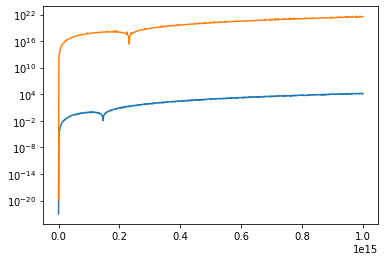

In [193]:
plt.semilogy(np.abs(m6np),np.abs(ALTwoFermionnp(m6np,1,3)))
plt.semilogy(np.abs(m6np),np.abs(ARTwoFermionnp(m6np,1,3)))

## Branchig ratio

In [194]:
ALtot =lambda m6,a,b: ALOneFermionnp(m6,a,b) + ALTwoFermionnp(m6,a,b)
ARtot =lambda m6,a,b: AROneFermionnp(m6,a,b) + ARTwoFermionnp(m6,a,b)

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value 

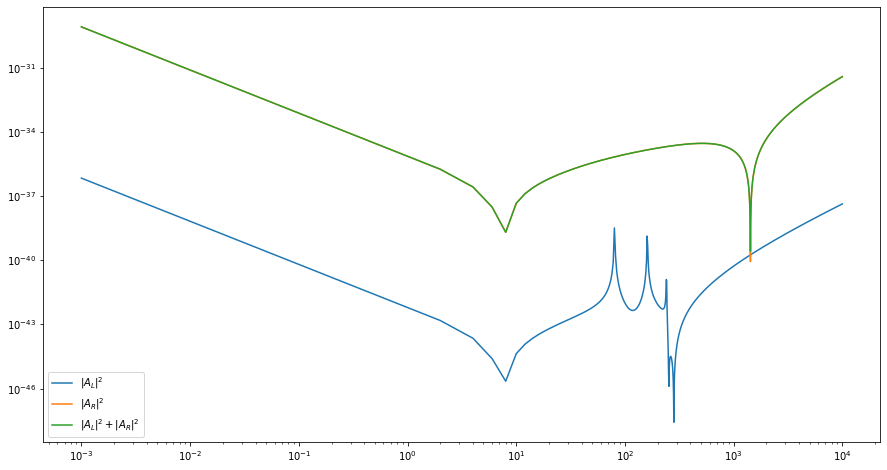

In [195]:
m6np = np.linspace(1e-3,1e4,5000)
plt.figure(figsize=(15,8))
plt.loglog(m6np,np.abs(ALtot(m6np,1,3))**2,label='$|A_L|^2$')
plt.loglog(m6np,np.abs(ARtot(m6np,1,3))**2,label='$|A_R|^2$')
plt.loglog(m6np,np.abs(ALtot(m6np,1,3))**2 + np.abs(ARtot(m6np,1,3))**2,
             label='$|A_L|^2 + |A_R|^2$')
plt.legend()

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt


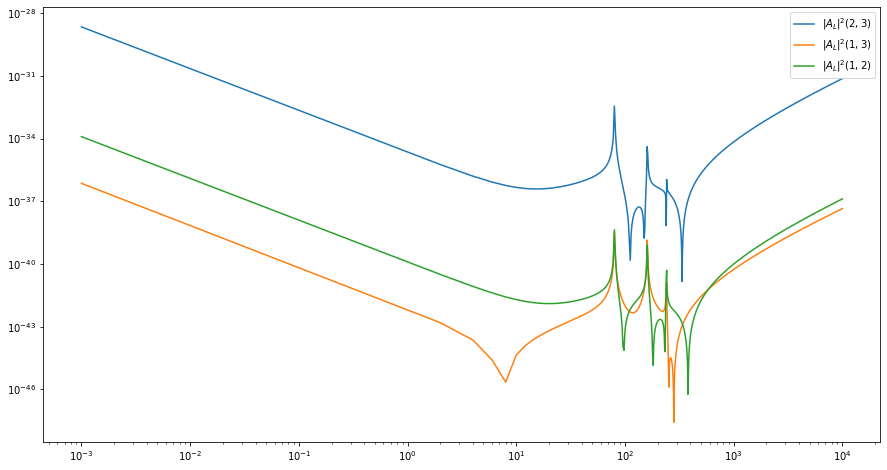

In [196]:
m6np = np.linspace(1e-3,1e4,5000)
plt.figure(figsize=(15,8))
plt.loglog(m6np,np.abs(ALtot(m6np,2,3))**2,label='$|A_L|^2(2,3)$')
plt.loglog(m6np,np.abs(ALtot(m6np,1,3))**2,label='$|A_L|^2(1,3)$')
plt.loglog(m6np,np.abs(ALtot(m6np,1,2))**2,label='$|A_L|^2(1,2)$')
plt.legend()

In [197]:
from OneLoopLFVHD import BRhlilj,Γhlilj

Adding Higgs decays to heavy neutrinos

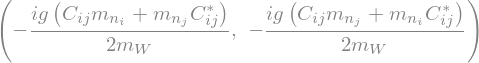

In [198]:
ALN = -I*g/(2*mW)*(mni*Cijs + mnj*Cijcs)
ARN = -I*g/(2*mW)*(mnj*Cijs + mni*Cijcs)
ALN,ARN

In [199]:
ALNnp = lambdify([mni,mnj,Cijs,Cijcs],ALN.subs(valores),'numpy')
ARNnp = lambdify([mni,mnj,Cijs,Cijcs],ARN.subs(valores),'numpy')
def ΓhNiNj(AL,AR,ma=125.18,mi=1,mj=60):
    if np.real(mi+mj)/2<ma/2:
        X =  Γhlilj(AL,AR,ma=ma,mi=mi,mj=mj)
    else:
        X = 0
    return X
ΓhNiNj = np.vectorize(ΓhNiNj)

In [200]:
#m6=np.linspace(1,400,100)
#ma=mh
#mN = {4:m6/3,5:m6/2,6:m6}
#sumaN = np.sum(np.nan_to_num(ΓhNiNj(ALNnp(mN[i],mN[j],Cij(m6,i,j),np.conjugate(Cij(m6,i,j))),
#                          ARNnp(mN[i],mN[j],Cij(m6,i,j),np.conjugate(Cij(m6,i,j))),
#                         ma=ma,mi=mN[i],mj=mN[j]))
#                   for i in [4,5,6] for j in [4,5,6])
#plt.semilogy(m6,sumaN)

In [201]:
def BRhlilj(m6,ma=125.18,i=2,j=3):
    mtau = 1.77686
    mmu = 0.10566
    me = 0.000511
    ml = {1:me,2:mmu,3:mtau}
    masas = mis(m6)
    mm1 = masas[0]
    mm6 = masas[-1]
    X = lambda AL,AR,a,b:Γhlilj(AL,AR,ma=ma,mi=ml[a],mj=ml[b])
    suma = sum(X(ALtot(m6,a,b),ARtot(m6,a,b),a,b) 
                              for a in [1,2,3] for b in [1,2,3] if a!=b)
    mN = {4:m6/3,5:m6/2,6:m6}
    sumaN = sum(np.nan_to_num(ΓhNiNj(ALNnp(mN[i],mN[j],Cij(mm1,mm6,i,j),np.conjugate(Cij(mm1,mm6,i,j))),
                          ARNnp(mN[i],mN[j],Cij(mm1,mm6,i,j),np.conjugate(Cij(mm1,mm6,i,j))),
                         ma=ma,mi=mN[i],mj=mN[j]))
                   for i in [4,5,6] for j in [4,5,6])
    return np.nan_to_num(Γhlilj(ALtot(m6,i,j),ARtot(m6,i,j),ma=ma,mi=ml[i],mj=ml[j]))/(suma + 4.07e-3+ sumaN)#+ sumaN 

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
/home/moiseszm/miniconda3/lib/python3.7/site-packages/OneLoopLFVHD/LFVHDFeynGv3.py:864: RuntimeWarning: invalid value encountered in sqrt
  r = 1/(8 *np.pi* ma)*np.sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(np.abs(ML)**2 + np.abs(MR)**2)-4*mi*mj*np.real(ML*np.conj(MR)))
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: divide by zero encountered 

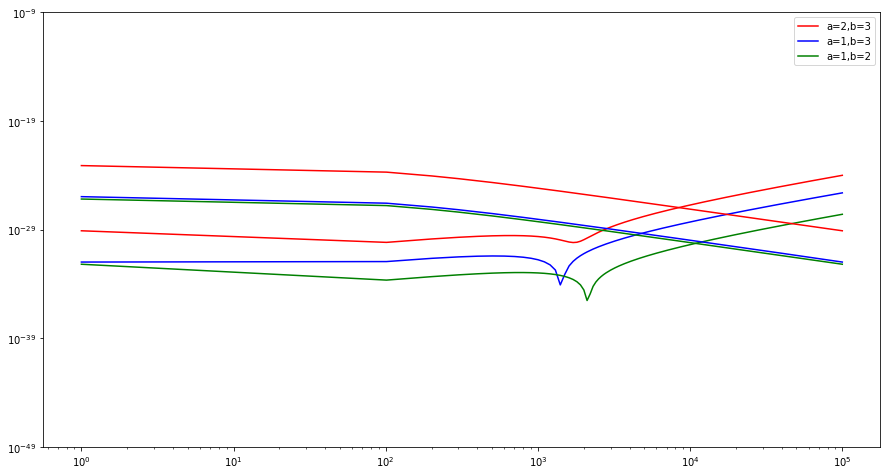

In [208]:
n = 1000
m6np = np.linspace(1,1e5,n)#+ np.zeros(n)*1j
m6np1 = np.linspace(1e-3,1,n)
mtau = 1.77686
mmu = 0.10566
me = 0.000511
ml = {1:me,2:mmu,3:mtau}
mh = 125.18
X = lambda m6,a,b:BRhlilj(m6,ma=mh,i=a,j=b)
#cond = X<1e60
plt.figure(figsize=(15,8))
plt.loglog(m6np,X(m6np,2,3),'r',label='a=2,b=3')
plt.loglog(m6np,X(m6np,1,3),'b',label='a=1,b=3')
plt.loglog(m6np,X(m6np,1,2),'g',label='a=1,b=2')
plt.loglog(m6np,X(m6np1,2,3),'r')
plt.loglog(m6np,X(m6np1,1,3),'b')
plt.loglog(m6np,X(m6np1,1,2),'g')
plt.legend()
#plt.xticks([1,10**4,10**8,10**12,10**16])
plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9]);

In [203]:
m6 = 1e15
AL = 0
a=2
b=3
for i in range(1,7):
    L = ALOneFermionS.subs(
        {ma:ml[a],mb:ml[b],mni:mis(m6)[i-1],Ubi:Unu(m1,m6,b,i),
         Ucai:np.conjugate(Unu(m1,m6,a,i))}
    ).n()#.atoms(Symbol)
    display(L)
    AL+= L
np.real(AL)

array(0.000461168081418091 - 7.52722582753773e-32*I, dtype=object)

In [204]:
mis(m6)

array([1.00000000e-12, 8.71779789e-12, 4.95782210e-11, 3.33333333e+14,
       5.00000000e+14, 1.00000000e+15])

In [205]:
m6 = 100000
a=2
b=3
for i in range(1,7):
    L = ALOneFermionS.subs({ma:ml[a],mb:ml[b]}).subs(
    {mni:mis(m6)[i-1]}).n()#.atoms(Symbol)
    display(L)

In [248]:
for i in range(1,7):
    L = Unu(m1,m6,b,i)*np.conjugate(Unu(m1,m6,a,i))#.atoms(Symbol)
    print(L)

-0.1850737866588939
-0.33118960629192123
0.485495249283607
(-5.552213599766814e-18-0j)
(-5.73254672659657e-17+0j)
(2.439100301304206e-16+0j)


In [ ]:
d21,d31

In [271]:
from sympy import integrate,log,plot,solve,Add

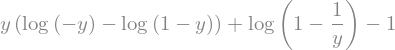

In [220]:
y,t = symbols('y,t')
f0 = integrate(log(1-(t/y)),(t,0,1))
f1 = 2*integrate(t*log(1-(t/y)),(t,0,1))
f0.collect(y)

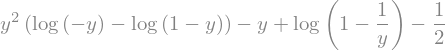

In [221]:
f1.collect(y)

In [274]:
f0np = lambdify([y],f0,'numpy')
f1np = lambdify([y],f1,'numpy')

f0sp = lambdify([y],f0,'sympy')
f1sp = lambdify([y],f1,'sympy')

/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


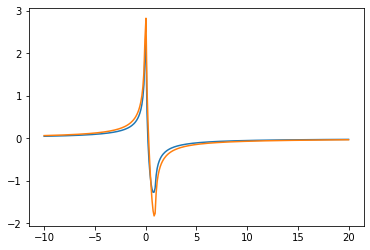

In [251]:
ynp = np.linspace(-10,20,300)+np.zeros(300)*1j
plt.plot(ynp,f0np(ynp))
plt.plot(ynp,f1np(ynp))

In [234]:
M0,M1,M2,mh,mi,mj = symbols('M_0,M_1,M_2,m_h,m_i,m_j',real=True)
ec1 = y**2*mh**2 - y*(mi**2 + M1**2-M0**2) + M1**2
ec2 = y**2*mh**2 - y*(mj**2 + M2**2-M0**2) + M2**2
y11,y12 = solve(ec1,y)
y21,y22 = solve(ec2,y)

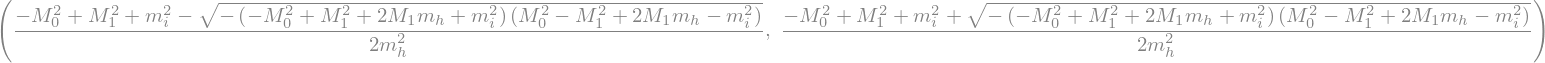

In [235]:
y11,y12

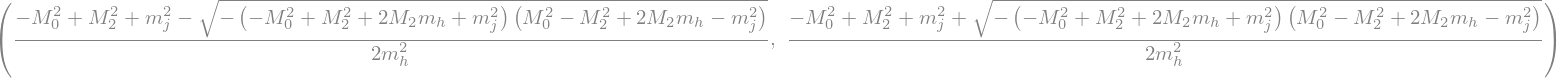

In [236]:
y21,y22

In [270]:
y11sp = lambdify([mh,mi,M0,M1],y11,'sympy')
y12sp = lambdify([mh,mi,M0,M1],y12,'sympy')
y21sp = lambdify([mh,mj,M0,M2],y21,'sympy')
y22sp = lambdify([mh,mj,M0,M2],y22,'sympy')

In [282]:
f01sum = Add(*[f0sp(y1j(mh,mi,M0,M1)) for y1j in [y11sp,y12sp ]])
#f01sum

f02sum = Add(*[f0sp(y2j(mh,mj,M0,M2)) for y2j in [y21sp,y22sp ]])
#f02sum

f11sum = Add(*[f1sp(y1j(mh,mi,M0,M1)) for y1j in [y11sp,y12sp ]])
#f11sum

f12sum = Add(*[f1sp(y2j(mh,mj,M0,M2)) for y2j in [y21sp,y22sp ]])
#f12sum

In [308]:
B1_0 = lambdify([mh,mi,M0,M1],-log(M1**2)-f01sum,'sympy')
B2_0 = lambdify([mh,mj,M0,M2],-log(M2**2)-f02sum,'sympy')
B1_1 = lambdify([mh,mi,mj,M0,M1,M2],(1/2)*(-log(M1**2))-f01sum+ (1/2)*f11sum,'sympy')
B2_1 = lambdify([mh,mi,mj,M0,M1,M2],(1/2)*(-log(M1**2))-f01sum+ (1/2)*f11sum,'sympy')


B1_0np = lambdify([mh,mi,M0,M1],B1_0(mh,mi,M0,M1),'numpy')
B2_0np = lambdify([mh,mj,M0,M2],B2_0(mh,mj,M0,M2),'numpy')
B1_1np = lambdify([mh,mi,mj,M0,M1,M2],B1_1(mh,mi,mj,M0,M1,M2),'numpy')
B2_1np = lambdify([mh,mi,mj,M0,M1,M2],B2_1(mh,mi,mj,M0,M1,M2),'numpy')

In [309]:
(-log(M1**2)-f01sum).atoms(Symbol)

In [310]:
a = B1_0np(125.18,ml[1],mninp,80)
b = lfvhd.B1_0(mni,mW).subs(lfvhd.cambiosDivFin(mni,mW,mW)).subs(
    lfvhd.Δe,0).subs(lfvhd.cambios_aprox(mni,mW,mW)).subs({mW:80,lfvhd.ma:125.18})

/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/moiseszm/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


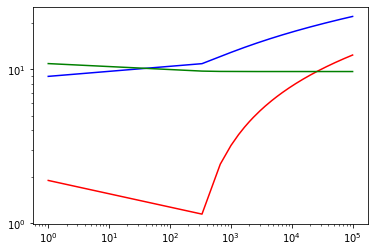

In [311]:
bnp = lambdify([mni],b,'numpy')
plt.loglog(mninp,np.abs(a),'b')
plt.loglog(mninp,np.abs(bnp(mninp)),'r')
plt.loglog(mninp,np.abs(bnp(mninp)-a),'g')

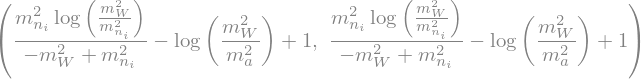

In [312]:
lfvhd.B1_0(mni,mW).subs(lfvhd.cambiosDivFin(mni,mW,mW)).subs(
    lfvhd.Δe,0).subs(lfvhd.cambios_aprox(mni,mW,mW)),lfvhd.B2_0(mni,mW).subs(lfvhd.cambiosDivFin(mni,mW,mW)).subs(
    lfvhd.Δe,0).subs(lfvhd.cambios_aprox(mni,mW,mW))